In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
dataset=pd.read_csv('Social_Network_Ads.csv')

In [55]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [56]:
X=dataset.iloc[:,2:4].values
y=dataset.iloc[:,4].values

In [57]:
from sklearn.cross_validation import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc_x=StandardScaler()

In [61]:
X_train=sc_x.fit_transform(X_train)

C:\Users\shivam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [62]:
X_test=sc_x.fit_transform(X_test)

C:\Users\shivam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
classifier=LogisticRegression(random_state=0)

In [65]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
y_pred=classifier.predict(X_test)

In [67]:
#creating confusion matrix
y_pred.shape

(100,)

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
#How many predcition are true or False:
cm=confusion_matrix(y_test,y_pred)

In [70]:
#here dig. sum 63+25=88 means 88 are true pred. and 12 are false in test set out of 100.
cm

array([[63,  5],
       [ 7, 25]], dtype=int64)

In [71]:
#for visualization

In [72]:
from matplotlib.colors import ListedColormap

In [73]:
#visualiazation for training set:--
X_set,y_set=X_train,y_train

In [74]:
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

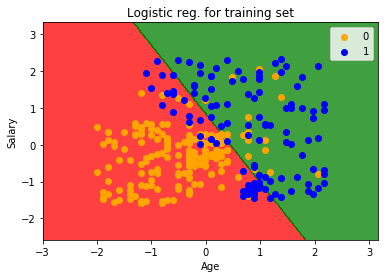

In [75]:
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('Logistic reg. for training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [76]:
#Visualization of test set

In [77]:
X_set,y_set=X_test,y_test

In [78]:
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

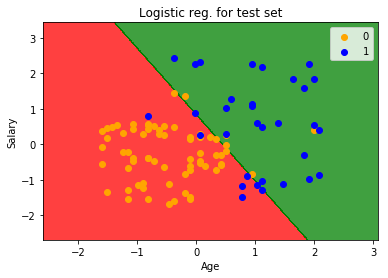

In [79]:
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('orange','blue'))(i),label=j)
plt.title('Logistic reg. for test set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [80]:
#accuracy:-
print("Accuarcy in Logistics regression is--::",classifier.score(X_test,y_test))

Accuarcy in Logistics regression is--:: 0.88


In [ ]:
#end----